# Exercise 7 - Classifier Comparison (Applied)


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (
    make_moons,
    make_classification,
    fetch_20newsgroups,
    load_iris,
    load_wine,
)
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [39]:
models = [
    make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3)),
    make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    GaussianNB(),  # NB doesn't need scaling
    make_pipeline(StandardScaler(), LinearDiscriminantAnalysis()),
    make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis()),
]
model_names = ["KNN", "LR", "NB", "LDA", "QDA"]

In [40]:
def create_plot(X, y, dataset):
    scores = []
    for model, name in zip(models, model_names):
        try:
            cv_scores = cross_val_score(model, X, y, cv=5)
        except ValueError:
            # fallback for models that can't handle sparse matrices
            cv_scores = cross_val_score(model, X.toarray(), y, cv=5)
        for s in cv_scores:
            scores.append({"Model": name, "Accuracy": s})

    df_scores = pd.DataFrame(scores)

    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x="Model",
        y="Accuracy",
        data=df_scores,
        palette="Set2",
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "black",
            "markeredgecolor": "black",
        },
    )
    sns.stripplot(
        x="Model", y="Accuracy", data=df_scores, color="black", alpha=0.5, jitter=True
    )

    plt.title(
        f"Classifier Accuracy Distribution ({dataset})", fontsize=14, weight="bold"
    )
    plt.xlabel("Classification Models", fontsize=12)
    plt.ylabel("Accuracy Scores", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

In [41]:
def train_models(data):
    for x, y, title in data:
        create_plot(x, y, title)

In [42]:
data = []

x, y = make_moons(n_samples=500, noise=0.2)
data.append((x, y, "make_moons"))

x, y = make_classification(
    n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0
)
data.append((x, y, "make_classification"))

newsgroups = fetch_20newsgroups(subset="train", categories=["sci.space", "rec.autos"])
vectorizer = TfidfVectorizer(stop_words="english", max_features=2000)
x = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target
data.append((x, y, "fetch_20newsgroups"))

iris = load_iris()
data.append((iris.data, iris.target, "load_iris"))

wine = load_wine()
data.append((wine.data, wine.target, "load_wine"))

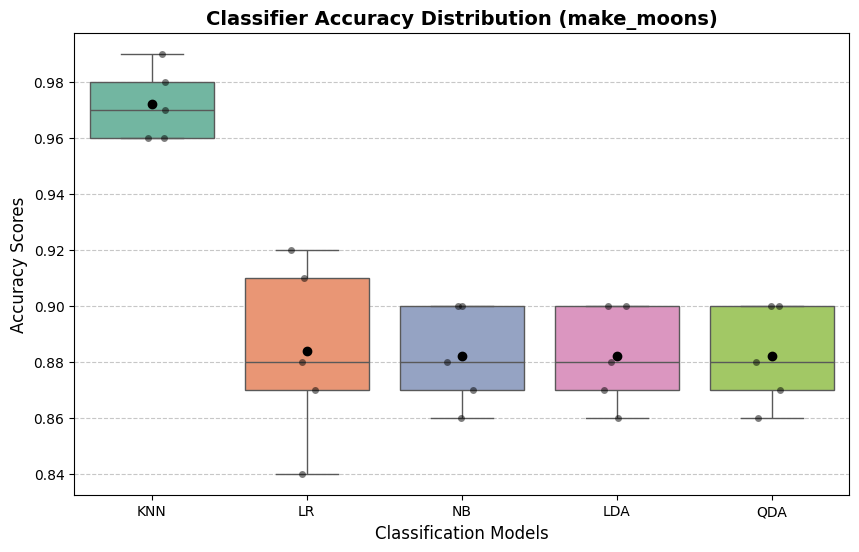

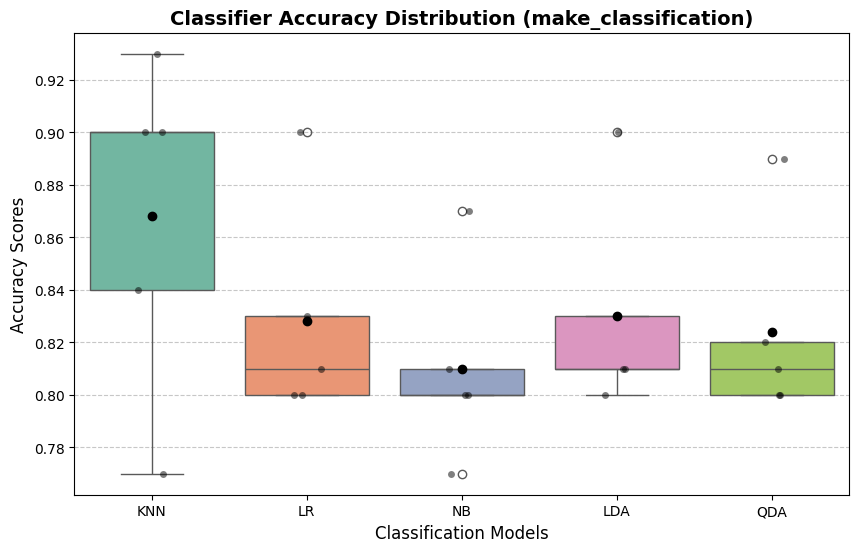

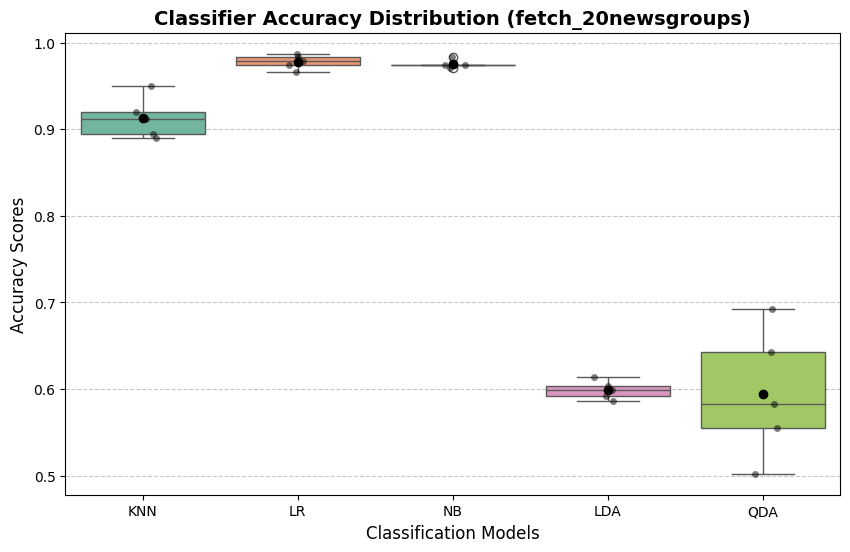

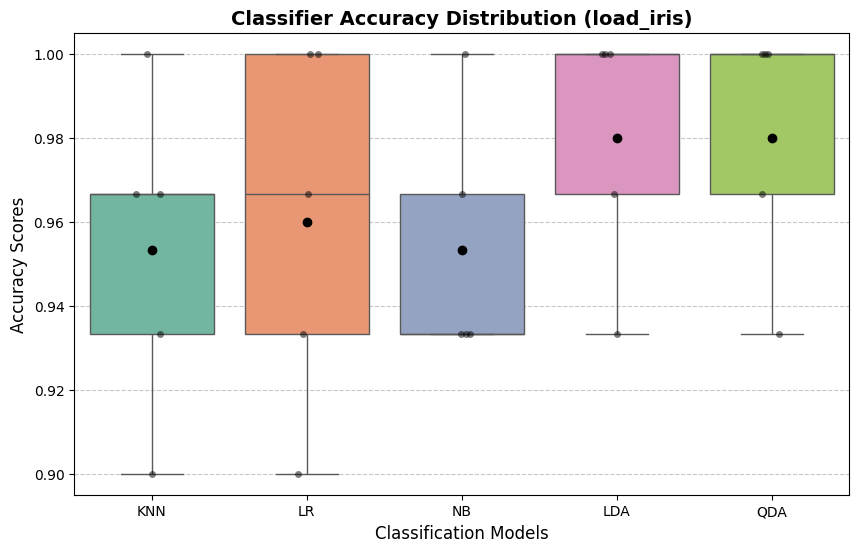

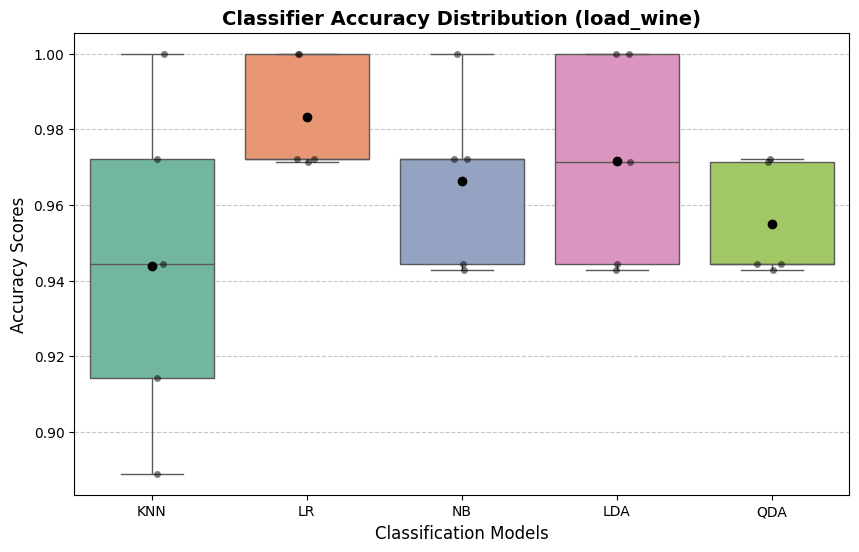

In [43]:
train_models(data)

# 📊 Model Performance Analysis on Different Datasets

Based on the accuracy distribution plots, we can infer the following:

---

### 1. **make_moons Dataset**

- **KNN** performs significantly better compared to the other models, showing higher accuracy but with notable variance.
- Other models remain stable but do not reach the performance level of KNN.

---

### 2. **make_classification Dataset**

- All models perform within a close accuracy range (≈84%–90%).
- This indicates that the dataset is fairly balanced and does not strongly favor any specific classifier.

---

### 3. **fetch_20newsgroups (Text Dataset)**

- **Logistic Regression (LR)** and **Naive Bayes (NB)** perform best, making them well-suited for text classification tasks.
- **KNN** performs moderately well but is less effective compared to LR and NB.
- **LDA** and **QDA** perform poorly, likely due to the high-dimensional sparse nature of TF-IDF features where assumptions of these models break down.

---

### 4. **Iris Dataset**

- **LDA, QDA, and Logistic Regression** show excellent performance.
- However, **all models** achieve high accuracy (above 90%), showing that Iris is an "easy" dataset for classification tasks.

---

### 5. **Wine Dataset**

- **Logistic Regression (LR)** and **LDA** are slightly ahead.
- Similar to the Iris dataset, **all models achieve >90% accuracy**, indicating that the dataset is well-structured and separable.

---

## ✅ Overall Conclusions

- **Best for Nonlinear Data (make_moons):** KNN shows dominance.
- **Balanced Dataset (make_classification):** All models perform comparably well.
- **Text Data (fetch_20newsgroups):** Logistic Regression and Naive Bayes are the top choices, while LDA/QDA fail.
- **Structured Datasets (Iris & Wine):** Almost all models achieve high performance, but LR and LDA consistently perform very well.

👉 These results confirm that **model selection should depend on the dataset characteristics**:

- Use **KNN** for nonlinear clusters.
- Use **LR/NB** for text data.
- Use **LDA/LR** for structured numeric datasets like Iris/Wine.
